<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#202020;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Data Analysis Report on Adult Dataset By Feyisayo Fagbore
    </h1>
    </div>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Import Libraries
    </h1>
    </div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Read Data Set
    </h1>
    </div>

In [2]:
df = pd.read_csv("adult.data.csv")
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Cleaning Data
    </h1>
    </div>

## Describing the data to check for abnormalities

In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Dropping any duplicates in the data

In [4]:
df=df.drop_duplicates()

## Dropping unnecessary columns

In [5]:
df = df.drop(["education-num" , "capital-gain", "capital-loss", "fnlwgt"], axis=1)
df.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Getting rid of the question marks(?) in the Native Country Column

In [6]:
df["native-country"] = df["native-country"].str.strip('?')
df.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (1): How many people of each race are represented in this dataset? 
            This should be a Pandas series with race names as the index labels. (race column)
    </h1>
    </div>



## counting number of races

In [7]:
n = len(pd.unique(df['race']))
 
print("THE NUMBER OF RACES IN THE DATASET IS :", n)

THE NUMBER OF RACES IN THE DATASET IS : 5


In [8]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

## Visualising the number of races in the dataset

<Axes: title={'center': 'THE NUMBER OF RACES IN THE DATASET(%)'}, ylabel='count'>

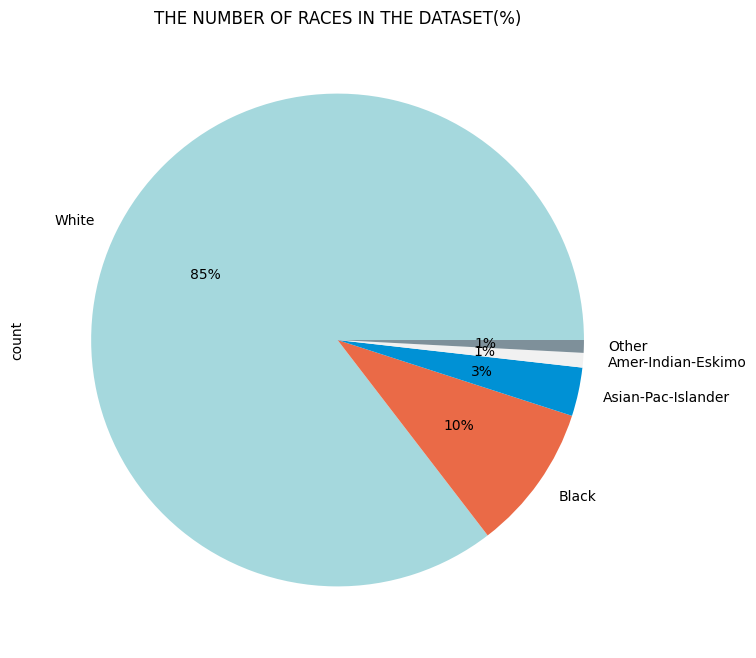

In [9]:
# Count the occurrences of values in column race
counts = df['race'].value_counts()

#REPRESENTING EACH RACE IN A PIECHART FORMAT
# Defining colors for the pie chart 
plt.title("THE NUMBER OF RACES IN THE DATASET(%)")
colors = ['#A5D8DD', '#EA6A47', '#0091D5','#F1F1F1', '#7E909A'] 

# Define the ratio of gap of each fragment in a tuple 
explode = (0.09, 0.09, 0.09, 0.09,0.09)
 

counts.plot( kind='pie', y='race', autopct='%1.0f%%', colors=colors, figsize= (8,8)) 


## <mark> Answer(1): THE NUMBER OF RACES IN THE DATASET IS 5</mark>

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
plt.style.use('seaborn-v0_8-pastel')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (2): What is the average age of men?
    </h1>
    </div>




In [10]:
#CALCULATING THE TOTAL NUMBER OF MEN AND WOMEN
mcounts = df['sex'].value_counts()
print(mcounts)

sex
Male      21775
Female    10762
Name: count, dtype: int64


In [11]:
# Create new pandas DataFramewith only the age and sex columns
df2 = df[['age','sex']]
print(df2.head(5))

   age     sex
0   39    Male
1   50    Male
2   38    Male
3   53    Male
4   28  Female


In [12]:
 # Delete rows where the 'sex' is 'Female' 
df2 = df2.drop(df2[df2['sex'] == 'Female'].index)
print(df2.head(5))

   age   sex
0   39  Male
1   50  Male
2   38  Male
3   53  Male
7   52  Male


In [13]:
print("THE AVERAGE AGE OF MEN IN THE DATA SET IS 39:")
m_avg = df2['age'].mean()
#rounding up age 
print(round(m_avg))

THE AVERAGE AGE OF MEN IN THE DATA SET IS 39:
39


### <mark> ANSWER(2):THE AVERAGE AGE OF MEN IN THE DATA SET IS 39 YEARS OLD </mark>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (3): What is the percentage of people who have a Bachelor's degree?
    </h1>
    </div>




In [14]:
#checking the number of People with bachelors degrees
bcounts = df['education'].value_counts()

print(bcounts)

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64


<Axes: title={'center': '16% OF PEOPLE IN THE DATASET HAVE A BACHELORS DEGREE'}, ylabel='count'>

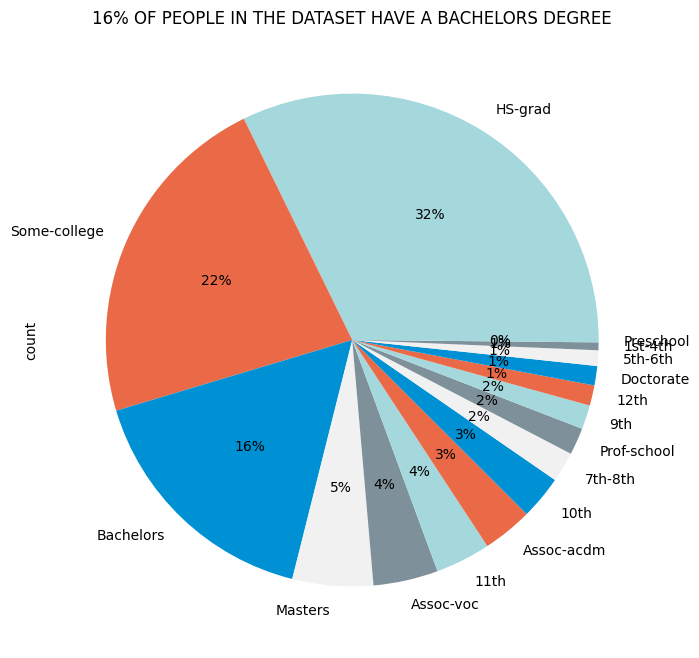

In [15]:
plt.title("16% OF PEOPLE IN THE DATASET HAVE A BACHELORS DEGREE")
bcounts.plot( kind='pie', y='education', autopct='%1.0f%%', colors=colors,figsize= (8,8)) 

## <mark>ANSWER(3): 16% OF PEOPLE IN THE DATASET HAVE A BACHELORS DEGREE</mark>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (4): What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
    </h1>
    </div>

In [35]:
total_count = len(df['salary'])
print('total count =', total_count)

total count = 32537


In [36]:
df3 = df[['education','salary']]
print(df3.head())

   education salary
0  Bachelors  <=50K
1  Bachelors  <=50K
2    HS-grad  <=50K
3       11th  <=50K
4  Bachelors  <=50K


In [37]:
#GETTING THE TOTAL NUMBER OF SALARY GREATER THAN 50K 

acounts = df3['salary'].value_counts()
print(acounts)
print('The total number of people earning above 50k is: 7839')

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64
The total number of people earning above 50k is: 7839


In [38]:
#DROP ROWS WHERE SALARY IS LESS THAN OR EQUALS TO 50K
df3 = df3.drop(df[(df3['salary'] == '<=50K')].index)
print(df3.head(7))

       education salary
7        HS-grad   >50K
8        Masters   >50K
9      Bachelors   >50K
10  Some-college   >50K
11     Bachelors   >50K
14     Assoc-voc   >50K
19       Masters   >50K


In [39]:
Ed_Advanced_Greater_50k = df3['education'].value_counts()
print(Ed_Advanced_Greater_50k)

education
Bachelors       2221
HS-grad         1674
Some-college    1386
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: count, dtype: int64


In [31]:
# Delete rows where the education is not advanced
df3 = df3.drop(df[(df['education'] == 'HS-grad')& (df3['salary'] == '>50K') |
                (df['education'] == 'Some-college')& (df3['salary'] == '>50K')|
                (df['education'] == 'Assoc-voc')& (df3['salary'] == '>50K')|
                (df['education'] == '5th-6th')& (df3['salary'] == '>50K')|
               (df['education'] == '7th-8th')& (df3['salary'] == '>50K')|
                (df['education'] == '11th') & (df3['salary'] == '>50K')|
               (df['education'] == '10th') & (df3['salary'] == '>50K')|
                (df['education'] == '9th')& (df3['salary'] == '>50K')|
                (df['education'] == '12th')& (df3['salary'] == '>50K')|
                (df['education'] == '1st-4th')& (df3['salary'] == '>50K')|
                (df['education'] == 'Assoc-acdm')& (df3['salary'] == '>50K')|
                (df['education'] == 'Prof-school')& (df3['salary'] == '>50K')|
                (df['education'] == 'Preschool')& (df3['salary'] == '>50K')].index)

df3.head(5)

,education,salary
8,Masters,>50K
9,Bachelors,>50K
11,Bachelors,>50K
19,Masters,>50K
20,Doctorate,>50K


In [32]:
#GETTING THE TOTAL NUMBER OF ONLY PEOPLE EARNING GREATER THAN 50K 
Advanced_Greater_50k = df3['salary'].value_counts()
print('The total number of people with advanced degrees earning above 50k is:',Advanced_Greater_50k)

The total number of people with advanced degrees earning above 50k is: salary
>50K    3486
Name: count, dtype: int64


<Axes: title={'center': 'PIE CHART SHOWING PERCENTAGE OF PEOPLE MAKING >50K'}, ylabel='count'>

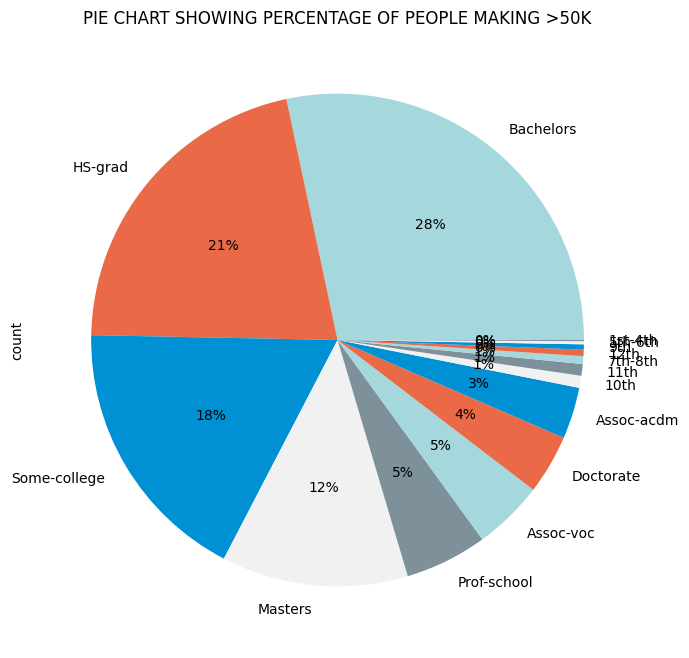

In [43]:
plt.title("PIE CHART SHOWING PERCENTAGE OF PEOPLE MAKING >50K")
Ed_Advanced_Greater_50k.plot( kind='pie', y='education', autopct='%1.0f%%', colors=colors,figsize= (8,8)) 

<Axes: title={'center': 'PIE CHART SHOWING PERCENTAGE OF SALARY'}, ylabel='count'>

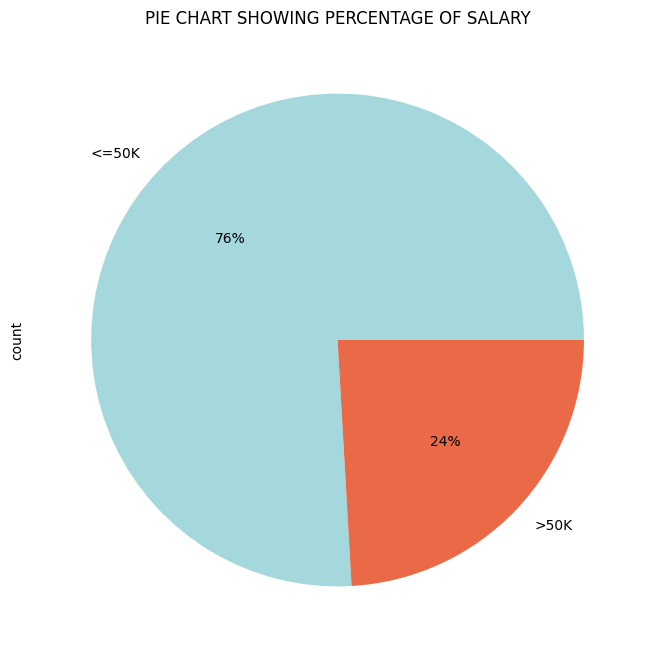

In [22]:
plt.title("PIE CHART SHOWING PERCENTAGE OF SALARY")
acounts.plot( kind='pie', y='education', autopct='%1.0f%%', colors=colors,figsize= (8,8)) 

In [23]:
#CALCULATING THE PERCENTAGE OF ONLY ADVANCED SALARY GREATER THAN 50K 
Advanced_Salary_Percentage = (Advanced_Greater_50k/total_count) * 100
print("The percentage of people with advanced degrees earning >50k is",round(Advanced_Salary_Percentage),"%" )

The percentage of people with advanced degrees earning >50k is salary
>50K    11.0
Name: count, dtype: float64 %


### <mark> ANSWER(4):The percentage of people with advanced degrees earning >50k  is 11 % </mark>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (5): What percentage of people without advanced education make more than 50K?
    </h1>
    </div>


In [83]:
df9 = df[['education','salary']]
print(df3.head())

    education salary
8     Masters   >50K
9   Bachelors   >50K
11  Bachelors   >50K
19    Masters   >50K
20  Doctorate   >50K


In [86]:
#DROP ROWS WHERE SALARY IS LESS THAN OR EQUALS TO 50K
df9 = df9.drop(df[(df9['salary'] == '<=50K')].index)
print(df9.head(7))

       education salary
7        HS-grad   >50K
8        Masters   >50K
9      Bachelors   >50K
10  Some-college   >50K
11     Bachelors   >50K
14     Assoc-voc   >50K
19       Masters   >50K


In [93]:
#DROP ROWS WHERE EDUCATION IS ADVANCED
df9 = df9.drop(df[(df9['education'] == 'Masters')& (df['salary'] == '>50K')|
                (df['education'] == 'Bachelors')& (df['salary'] == '>50K')|
                (df['education'] == 'Doctorate') & (df['salary'] == '>50K')].index)
print(df9.head(7))

       education salary
7        HS-grad   >50K
10  Some-college   >50K
14     Assoc-voc   >50K
27  Some-college   >50K
38  Some-college   >50K
52   Prof-school   >50K
55  Some-college   >50K


In [94]:
#GETTING THE TOTAL NUMBER OF ONLY PEOPLE EARNING GREATER THAN 50K WITHOUT ADVANCED DEGREES
No_Advanced_Greater_50k = df9['salary'].value_counts()
print('The total number of people without advanced degrees earning above 50k is:',No_Advanced_Greater_50k)

The total number of people without advanced degrees earning above 50k is: salary
>50K    4353
Name: count, dtype: int64


In [98]:
#CALCULATING THE PERCENTAGE OF ONLY ADVANCED SALARY GREATER THAN 50K 
Non_Advanced_Salary_Percentage = (No_Advanced_Greater_50k/total_count) * 100
print("The percentage of people without advanced degrees earning >50k is",round(Non_Advanced_Salary_Percentage),"%" )

The percentage of people without advanced degrees earning >50k is salary
>50K    13.0
Name: count, dtype: float64 %


<Axes: title={'center': 'PIE CHART SHOWING % OF NON ADVANCED EDUCATION MAKING >50K'}, ylabel='count'>

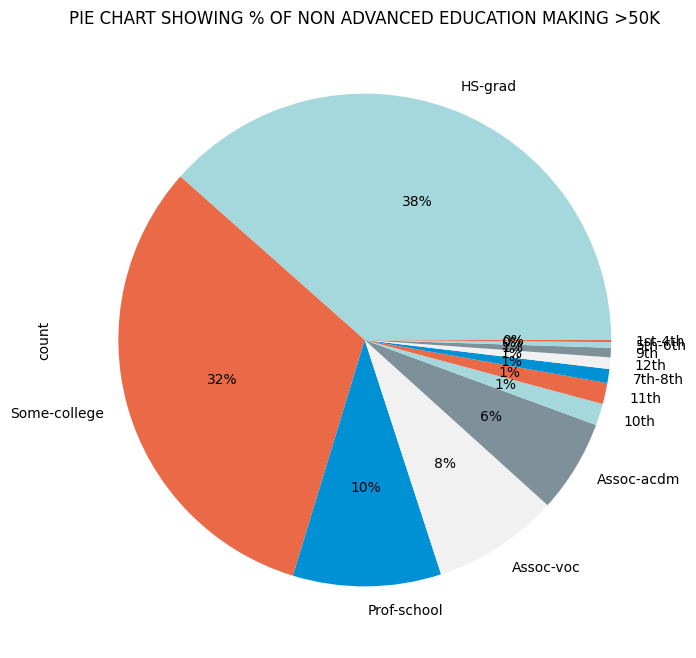

In [99]:
Ed_No_Advanced_Greater_50k = df9['education'].value_counts()

plt.title("PIE CHART SHOWING % OF NON ADVANCED EDUCATION MAKING >50K")
Ed_No_Advanced_Greater_50k.plot( kind='pie', y='education', autopct='%1.0f%%', colors=colors,figsize= (8,8)) 

### <mark>The percentage of people without advanced degrees earning >50k is 13 %</mark>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (6): What is the minimum number of hours a person works per week?
    </h1>
    </div>

In [112]:
df["hours-per-week"].min()

1

## <mark>ANSWER(6): THE MINIMUM NUMBER OF HOURS A PERSON WORKS PER WEEK IS 1 HOUR</mark>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (7): What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
    </h1>
    </div>

In [120]:
#Calculating the total number of people who work minimum number of hours per week & have a salary >50K
Min_no = len(df[(df['hours-per-week']== 1)&(df['salary']== '>50K')])
print("The total number of people who work minimum number of hours per week & have a salary >50K is: ",Min_no)

The total number of people who work minimum number of hours per week & have a salary >50K is:  2


In [123]:
#Calculating the total number of people who have a salary >50K and work average number of hours
Avg_nh = round(df["hours-per-week"].mean())
print('The average total number of hours per week is ',Avg_nh)

The average total number of hours per week is  40


In [124]:
G_percentage = (Min_no/Avg_nh) * 100
print("The percentage of the people who work the minimum number of hours per week have a salary of more than 50K is",round(G_percentage),"%" )


The percentage of the people who work the minimum number of hours per week have a salary of more than 50K is 5 %


## <mark>ANSWER(7): The percentage of the people who work the minimum number of hours per week have a salary of more than 50K is 5 %</mark>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (8): What country has the highest percentage of people that earn >50K and what is that percentage?
    </h1>
    </div>

In [132]:
#What country has the highest percentage of people that earn >50K
N_country = df['native-country'].value_counts()
print(N_country)

native-country
United-States                 29153
Mexico                          639
                                582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [134]:
#CREATING A DATAFRAME HOLDING ONLY THE NATIVE COUNTRIES AND SALARY
df4 = df[['native-country','salary']]
print(df4.head(5))

  native-country salary
0  United-States  <=50K
1  United-States  <=50K
2  United-States  <=50K
3  United-States  <=50K
4           Cuba  <=50K


In [135]:
#dropping rows with <=50k
df4 = df4.drop(df4[(df4['salary'] == '<=50K')].index)
print(df4.head(7))

   native-country salary
7   United-States   >50K
8   United-States   >50K
9   United-States   >50K
10  United-States   >50K
11          India   >50K
14                  >50K
19  United-States   >50K


In [139]:
c_counts = df4.value_counts()
print(c_counts)

native-country      salary
United-States       >50K      7169
                    >50K       146
Philippines         >50K        61
Germany             >50K        44
India               >50K        40
Canada              >50K        39
Mexico              >50K        33
England             >50K        30
Italy               >50K        25
Cuba                >50K        25
Japan               >50K        24
China               >50K        20
Taiwan              >50K        20
Iran                >50K        18
South               >50K        16
Poland              >50K        12
France              >50K        12
Puerto-Rico         >50K        12
Jamaica             >50K        10
El-Salvador         >50K         9
Greece              >50K         8
Cambodia            >50K         7
Yugoslavia          >50K         6
Hong                >50K         6
Ireland             >50K         5
Vietnam             >50K         5
Ecuador             >50K         4
Haiti               >50K    

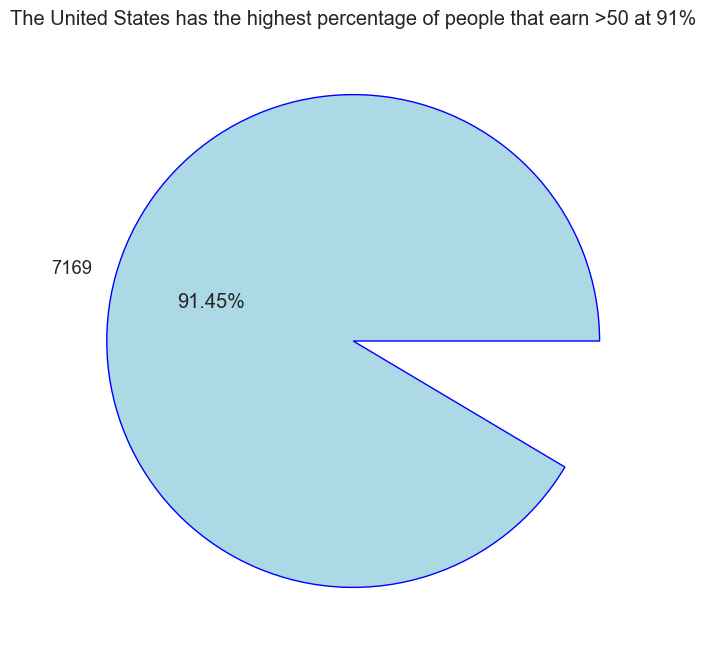

In [187]:
# Show only one slice
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))
 
patches, texts, autotexts = plt.pie(
    x=c_counts, 
    labels= c_counts,
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2')
)
 
# Iterate over slices
for idx, wedge in enumerate(patches): 
    # Hide all slices except the Age Group 35-54
    if (idx != 0):
        wedge.set_visible(False)
        texts[idx].set_visible(False)
        autotexts[idx].set_visible(False)
 
# Change the face and edge colors for Age Group 35-54 slice 
patches[0].set_edgecolor('blue')
patches[0].set_facecolor('lightblue')
plt.title("The United States has the highest percentage of people that earn >50 at 91%") 
plt.show()

## <mark>ANSWER(8): The United States has the highest percentage of people that earn >50K at 91%

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#0091D5;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:White;
              text-align:center;'>
        Question (9): Identify the most popular occupation for those who earn >50K in India.
    </h1>
    </div>

In [152]:
#NO OF INIAN POPULATION EARNING >50K
india_counts = df4[df4['native-country']== 'India'].value_counts()
print(india_counts)

native-country  salary
India           >50K      40
Name: count, dtype: int64


In [154]:
#CREATING A NEW DATAFRAME WITH ONLY OCCUPATION, NATIVE- COUNTRY AND SALARY AS COLUMNS
df5 = df[['occupation', 'native-country', 'salary']]
print(df5.head(4))

          occupation native-country salary
0       Adm-clerical  United-States  <=50K
1    Exec-managerial  United-States  <=50K
2  Handlers-cleaners  United-States  <=50K
3  Handlers-cleaners  United-States  <=50K


In [156]:
#DROPPING ROWS WITH SALARY  <=50K
df5 = df5.drop(df5[(df5['salary'] == '<=50K')].index)
print(df5.head(4))

         occupation native-country salary
7   Exec-managerial  United-States   >50K
8    Prof-specialty  United-States   >50K
9   Exec-managerial  United-States   >50K
10  Exec-managerial  United-States   >50K


In [165]:
#DROPPING ALL OTHER COUNTRIES EXCEPT INDIA
df5 = df5.drop(df5[(df5['native-country'] != 'India')].index)
i_counts = df5.value_counts()
print(i_counts)

occupation        native-country  salary
Prof-specialty    India           >50K      25
Exec-managerial   India           >50K       8
Other-service     India           >50K       2
Tech-support      India           >50K       2
Adm-clerical      India           >50K       1
Sales             India           >50K       1
Transport-moving  India           >50K       1
Name: count, dtype: int64


<Axes: title={'center': 'OCCUPATIONS OF INDIANS EARNING >50K'}, ylabel='count'>

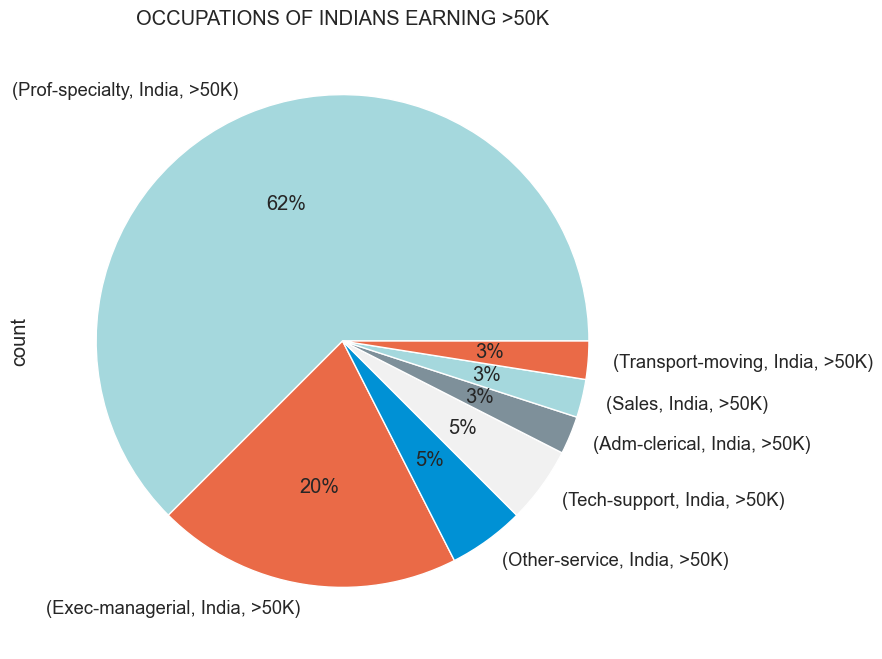

In [167]:
plt.title("OCCUPATIONS OF INDIANS EARNING >50K")
i_counts.plot( kind='pie',
              y='occupation', 
              autopct='%1.0f%%', 
              colors=colors,figsize= (8,8),
             ) 

## <mark>ANSWER(9): The most popular occupation for those who earn >50K in India is prof-speciality at 62%</mark>